In [43]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [44]:
def check_feature_numerical(feature):
  pattern = re.compile('\D')
  for item in df[feature]:
    if re.match(pattern, str(item)):
      return True
  return False

In [49]:
def vacopie(data):

  # preprocessing
  df = data.dropna(axis = 0, how ='any')    # remove rows with missing values
  features = [feature for feature in df.columns if check_feature_numerical(feature)==False]   # only numerical features
  df = df[features]
                                    
  f_len = df.shape[1]
  
  # Calculate and store variances(vars) and covariances (covs)
  cov_mat = np.matmul(df.values.T, df.values)/len(data)
  covs = list()
  outer_label_indexes = []
  vars = np.diagonal(cov_mat)
  for i in range(f_len):
    for j in range(f_len):
      if j!=i:
        covs.append(cov_mat[i,j])
        outer_label_indexes.append(j) # to be used later in plot
  # cov_mat

  covs_abs = np.reshape(abs(np.array(covs)), (f_len, f_len -1))
  normd_covs = covs_abs/covs_abs.sum(axis=1).reshape(f_len,1) # normalized
  sector_normd_covs = (normd_covs * vars.reshape(f_len,1)).flatten() # normalize sector-wise
  sector_normd_covs.reshape(f_len,f_len-1)

  # Generalized for any dataset
  l = sector_normd_covs

  size = 1
  radius = 2.1

  outer_cmaps = plt.get_cmap("Purples")
  inner_cmap = plt.get_cmap("Purples")

  inner_colors = inner_cmap(vars/sum(vars))
  outer_colors = np.array([outer_cmaps(l[i:i+f_len-1]/sum(l[i:i+f_len-1])) for i in range(0, f_len*(f_len-1), f_len-1)]).reshape(f_len*(f_len-1), 4)

  legend_labels = [f'F{i}' for i in range(1, f_len+1)]

  outer_labels = [legend_labels[i] for i in outer_label_indexes]

  inner_legend_labels = [f'F{label} ({features[label-1]})' for label in range(1, f_len+1)]
  print(inner_legend_labels)
  fig, ax = plt.subplots()
  outer_pie, _ = ax.pie(l, radius=radius, startangle=90, colors = outer_colors, labels = outer_labels,
       wedgeprops=dict(width=size, edgecolor='w'))

  inner_pie, _ = ax.pie(vars, radius=radius-size, startangle=90, labels = legend_labels, labeldistance=0.5, colors= inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
  plt.setp(inner_pie, edgecolor='black')
  plt.margins(0,0)
  plt.setp(outer_pie, edgecolor='black')
  plt.margins(0,0)
  plt.legend(loc=(0.9, 0.1))
  handles, labels = ax.get_legend_handles_labels()

  outer_labels_for_legend = [f'{label} ({features[int(label[1:])-1]})' for label in outer_labels]
  #ax.legend(handles[:], outer_labels_for_legend, loc=(2, 0.1))
  ax.legend(handles[12:], inner_legend_labels, loc=(1.5, 0.1))

  ax.set(aspect="equal")
  plt.savefig('fig')
  plt.show()


['F1 (sepal length (cm))', 'F2 (sepal width (cm))', 'F3 (petal length (cm))', 'F4 (petal width (cm))']


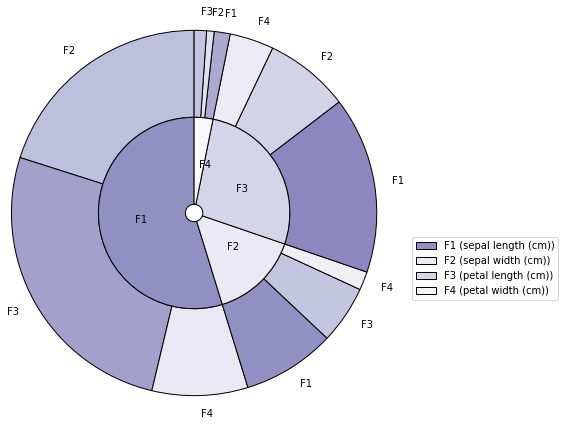

In [51]:
data = datasets.load_iris()

df = pd.DataFrame(data.data, columns = data.feature_names)
vacopie(df)